# Importing libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
diabetes = pd.read_csv(r"C:\Users\Hp\Desktop\insaid class\Projects\Diabetes health prediction\diabetes.csv")

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## About:
- The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes.describe().T               #T is for transpose

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Observation:
- It is showing there are no missing values in a dataset. 
- But all the missing values are given as zero.
- Hence we will first replace the 0 value with the NAN value then start the imputation process.

In [8]:
diabetes_copy = diabetes.copy(deep = True)
diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [9]:
diabetes_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Data visualization

### Plotting data distribution before removing null values.

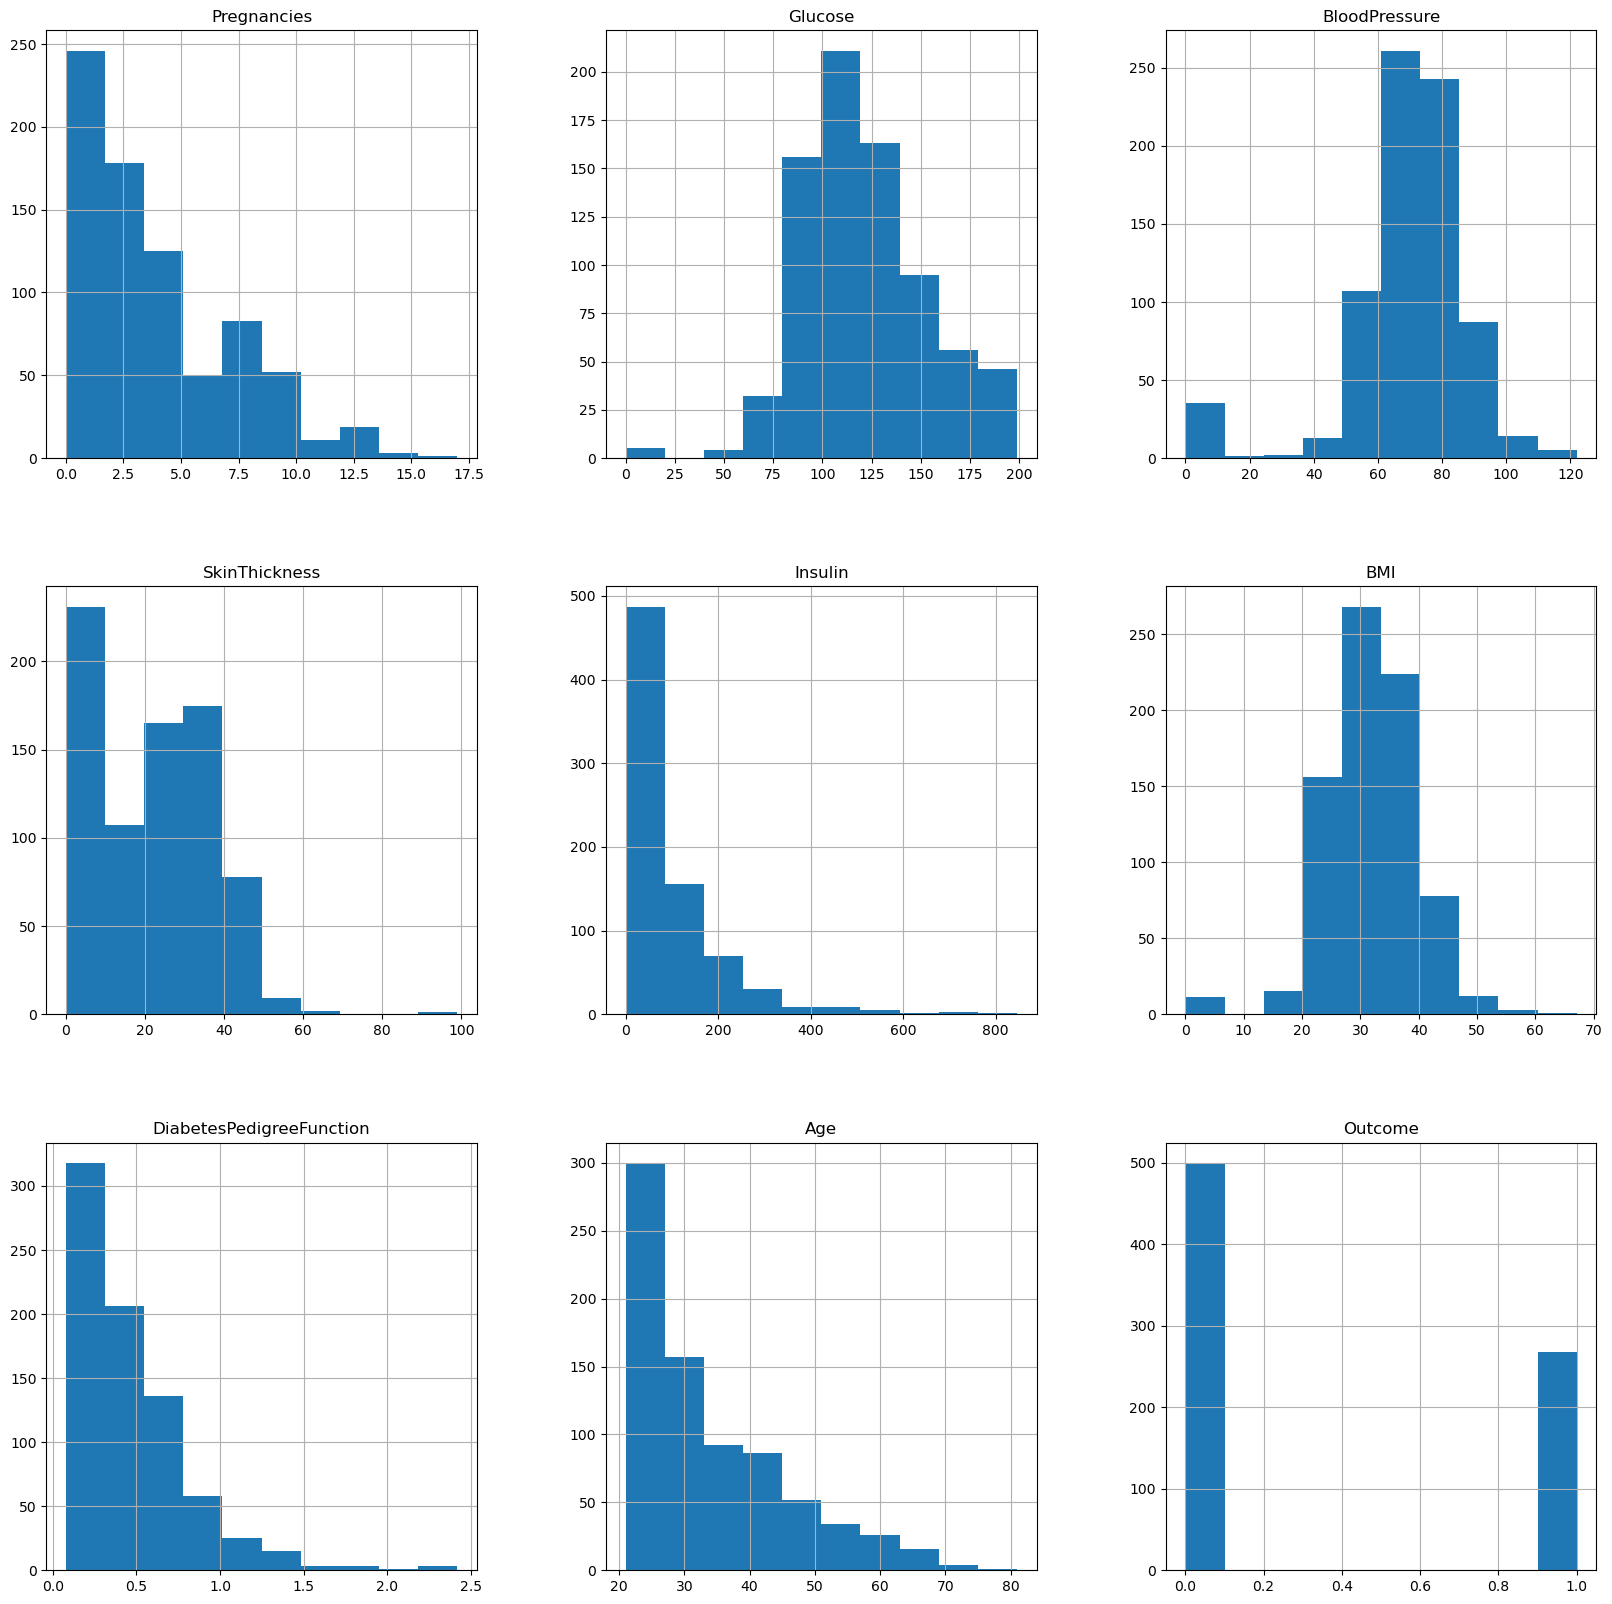

In [10]:
p= diabetes.hist(figsize=(20,20))

### Now we will be imputing the mean value of the column to each missing value of that particular column.

In [11]:
diabetes_copy['Glucose'].fillna(diabetes_copy['Glucose'].mean(), inplace = True)
diabetes_copy['BloodPressure'].fillna(diabetes_copy['BloodPressure'].mean(), inplace = True)
diabetes_copy['SkinThickness'].fillna(diabetes_copy['SkinThickness'].median(), inplace = True)
diabetes_copy['Insulin'].fillna(diabetes_copy['Insulin'].median(), inplace = True)
diabetes_copy['BMI'].fillna(diabetes_copy['BMI'].median(), inplace = True)

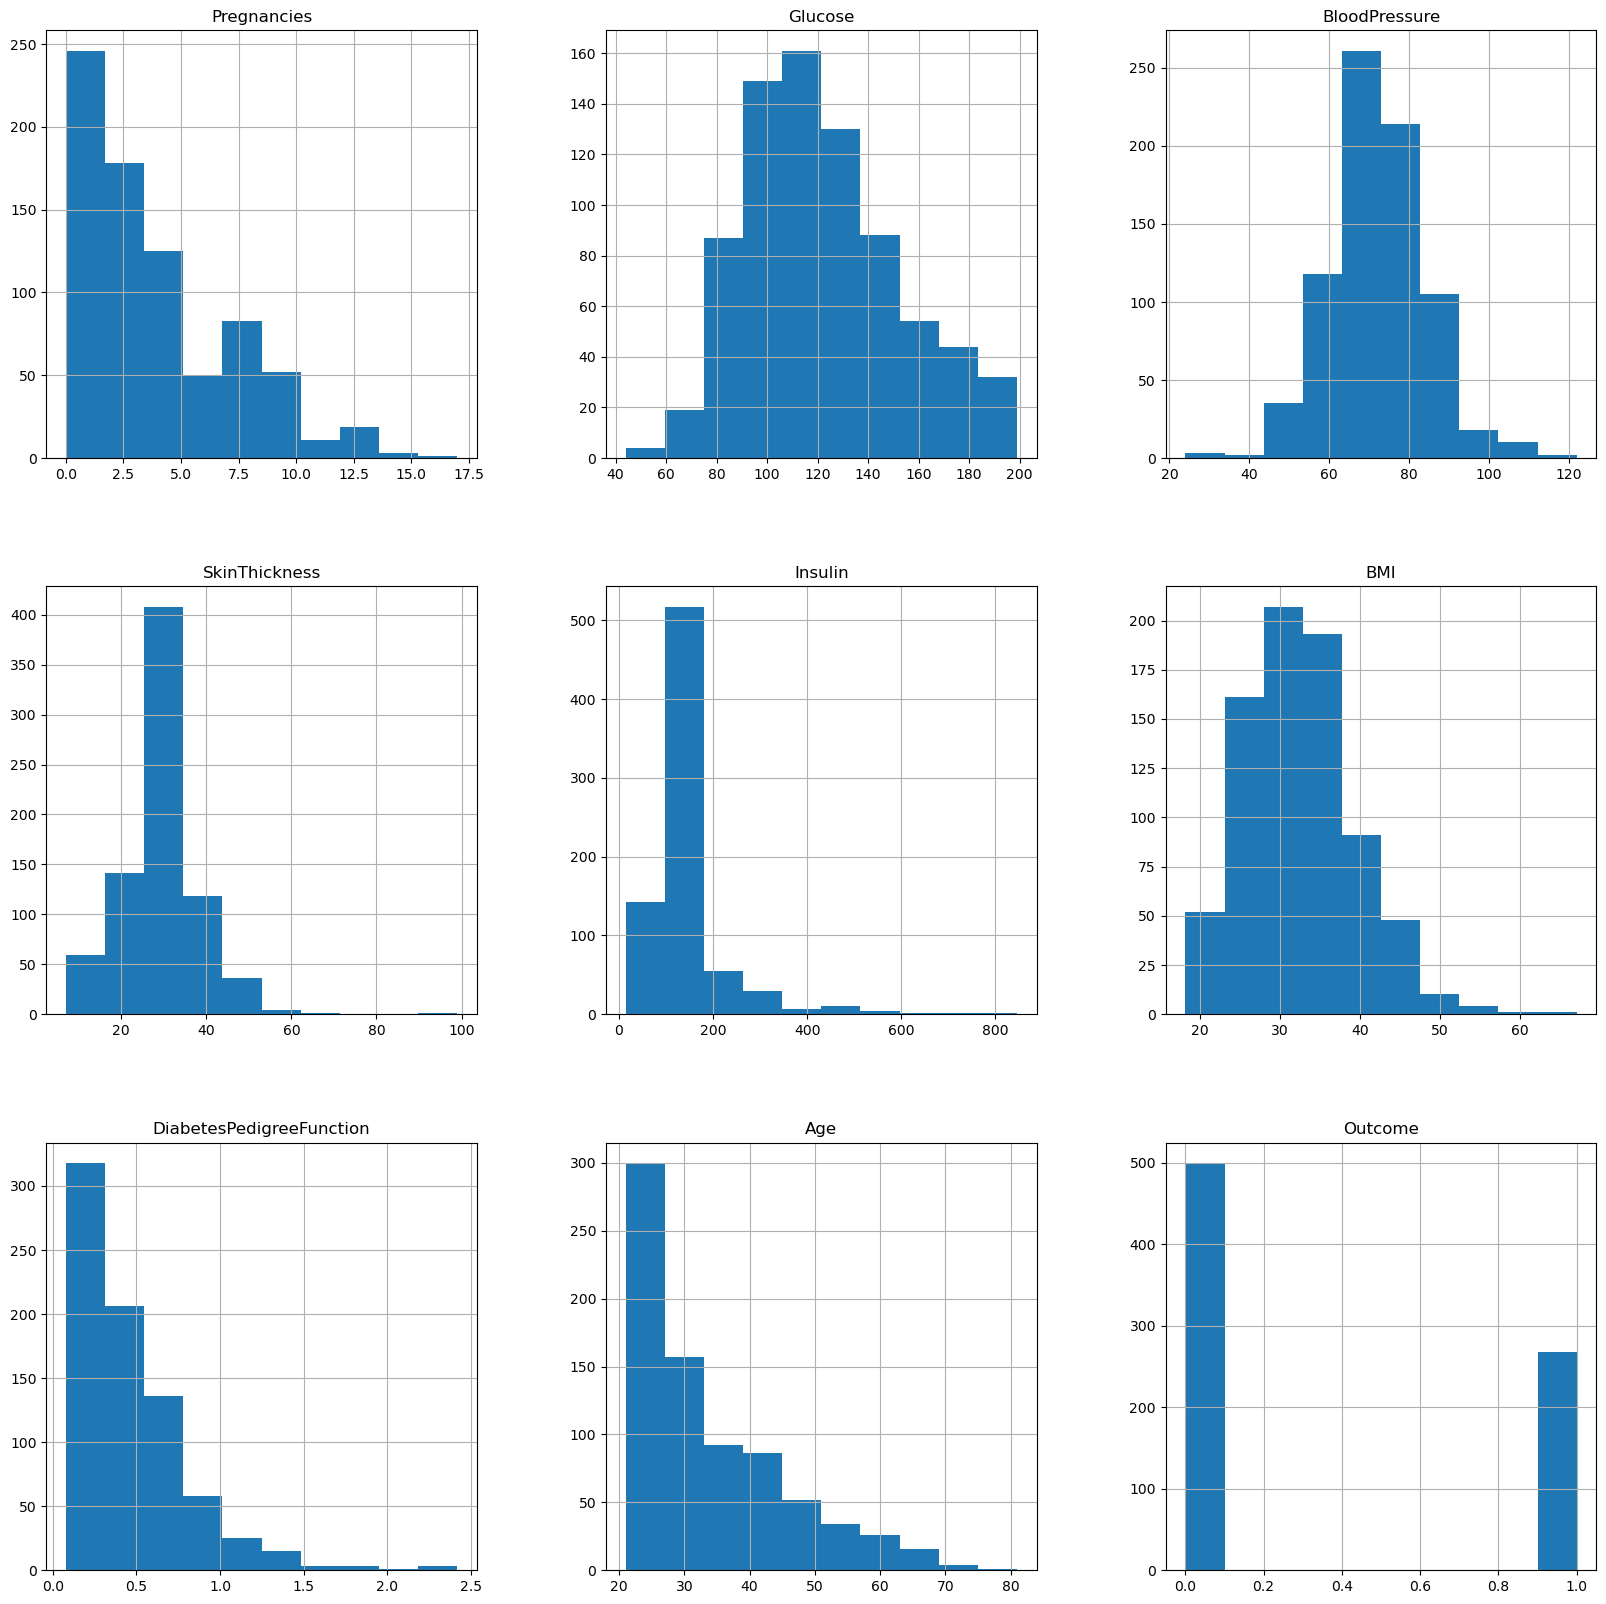

In [12]:
p = diabetes_copy.hist(figsize = (20,20))

<Axes: >

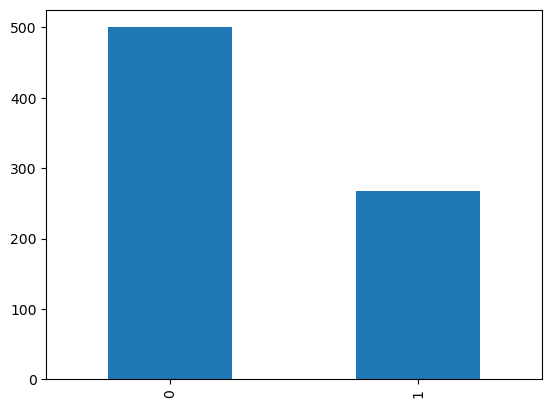

In [13]:
diabetes.Outcome.value_counts().plot(kind="bar")

In [14]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Observation:
- Here from the above visualization it is clearly visible that our dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.

(<Axes: >, <Axes: >)

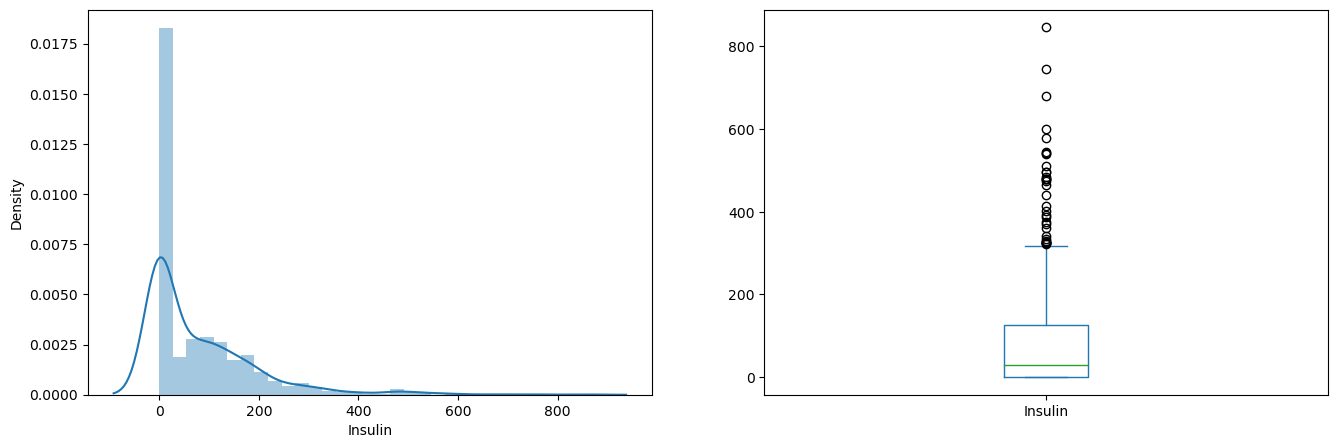

In [15]:
plt.subplot(1,2,1), sns.distplot(diabetes['Insulin'])
plt.subplot(1,2,2), diabetes['Insulin'].plot.box(figsize=(16,5))

### Observation:
- Here we can see Distplot which can be helpful to see the distribution of the data as well as with the help of boxplot we can see the outliers in that column 

<Axes: >

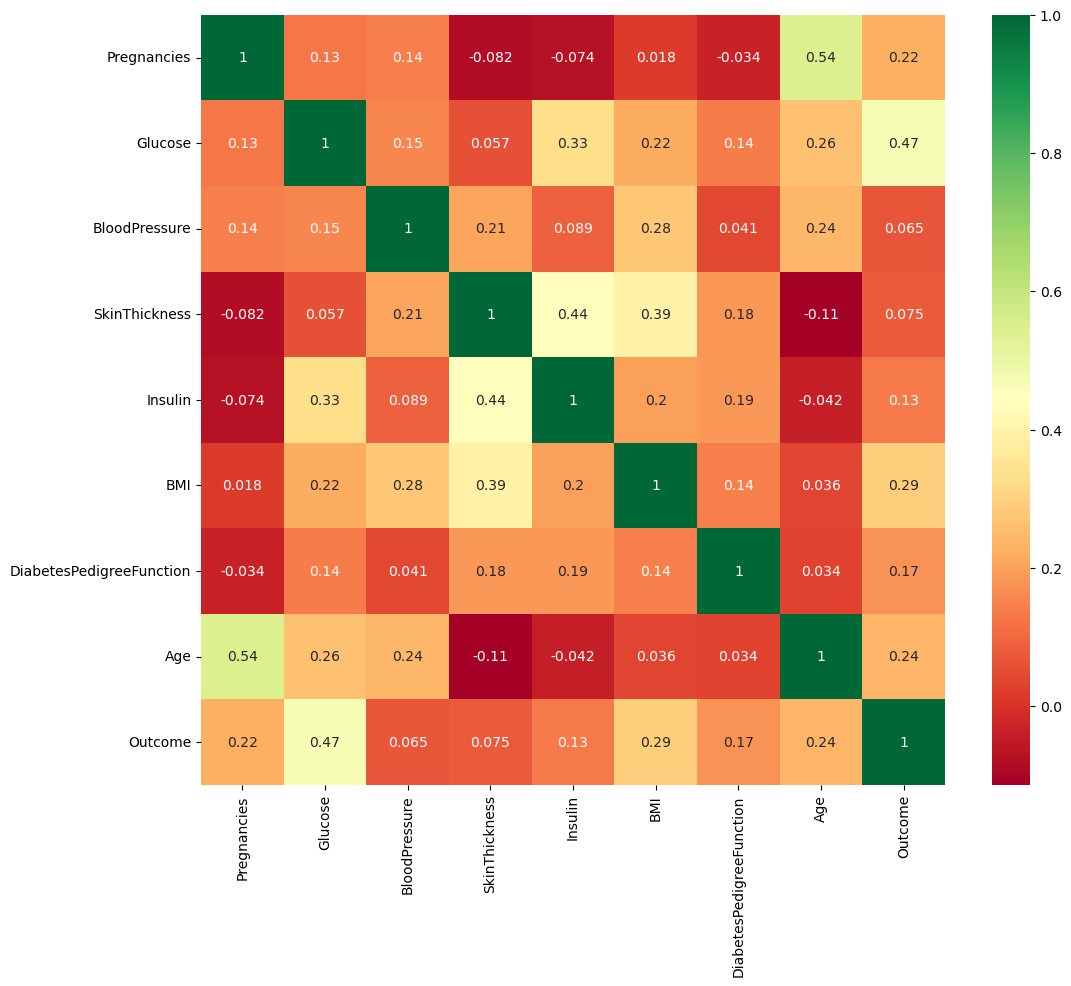

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(diabetes.corr(), annot=True,cmap ='RdYlGn')

# Scaling the data

In [17]:
diabetes_copy.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0


#### After Scaling

In [18]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


### Observation:
- That’s how our dataset will be looking like when it is scaled down or we can see every value now is on the same scale which will help our ML model to give a better result.

# Model building

In [19]:
# Splitting the dataset
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [20]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33, random_state=7)

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
import xgboost as xgb

In [37]:
from sklearn import svm

In [22]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [23]:
rfc_train = rfc.predict(X_train)          #checking accuracy on training dataset
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


#### Model is overfitting on training dataset

### Finding Best model

In [38]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Adaboost':AdaBoostClassifier(),
    'Gradient Boost':GradientBoostingClassifier(),
    'XGBoost':xgb.XGBClassifier(),
    'SVM':svm.SVC()
}
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)  # Predictions on training data
    y_pred_test = model.predict(X_test)    # Predictions on testing data

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    classification_rep_train = classification_report(y_train, y_pred_train)
    classification_rep_test = classification_report(y_test, y_pred_test)

    results[model_name] = {
        'train_accuracy': accuracy_train,
        'test_accuracy': accuracy_test,
        'train_classification_report': classification_rep_train,
        'test_classification_report': classification_rep_test
    }

# Display results for both training and testing datasets
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print("Training Results:")
    print(f"  Accuracy: {result['train_accuracy']:.2f}")
    print(f"  Classification Report:\n{result['train_classification_report']}\n")
    print("Testing Results:")
    print(f"  Accuracy: {result['test_accuracy']:.2f}")
    print(f"  Classification Report:\n{result['test_classification_report']}\n")

Model: Logistic Regression
Training Results:
  Accuracy: 0.77
  Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       338
           1       0.72      0.56      0.63       176

    accuracy                           0.77       514
   macro avg       0.76      0.72      0.73       514
weighted avg       0.77      0.77      0.77       514


Testing Results:
  Accuracy: 0.79
  Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       162
           1       0.74      0.63      0.68        92

    accuracy                           0.79       254
   macro avg       0.78      0.75      0.76       254
weighted avg       0.78      0.79      0.78       254


Model: Decision Tree
Training Results:
  Accuracy: 1.00
  Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       338
        

#### Observation:
- In case of Logistic regression, test set accuracy is more than training set.
- In case of decision tree and random forest model is overfitting on training dataset. 
- In adaboost and gradient boost there is huge difference in accuracy of training and test dataset. Means model is overfitting on training dataset.
- In case of SVM, there is no much difference in accuracy and F1 scores for both training and test dataset. Therefore, we will choose SVM as the best model.

# Feature selection

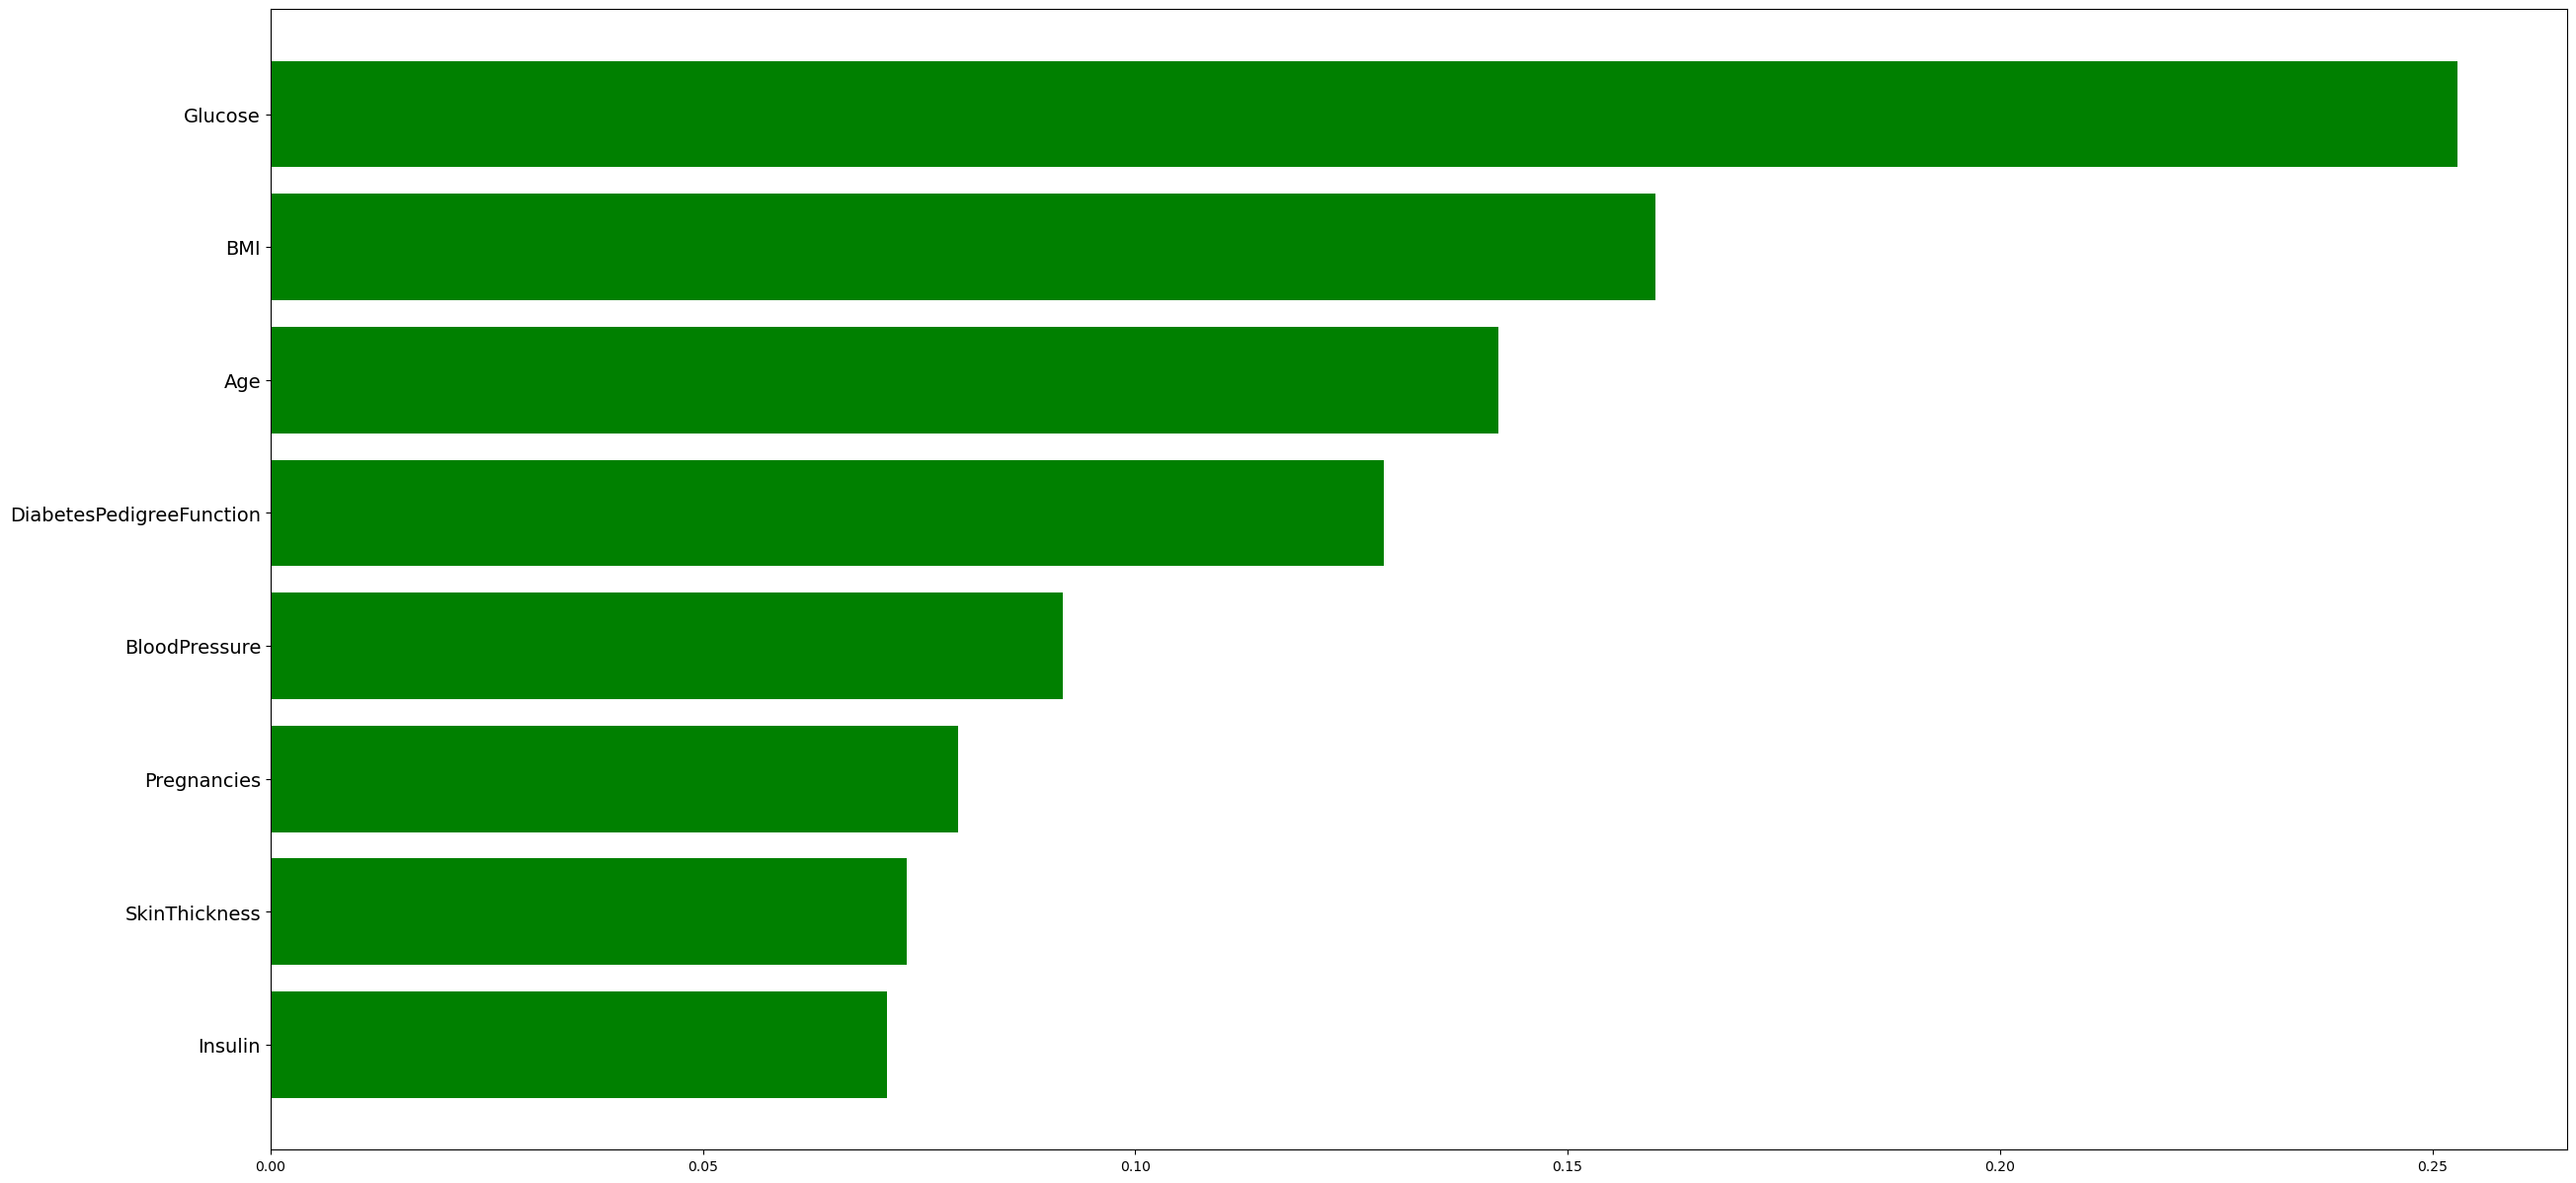

In [48]:
features = X_train.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=[30, 15])
plt.barh(y=range(len(indices)), width=importances[indices], color='g', align='center')
plt.yticks(ticks=range(len(indices)), labels=[features[i] for i in indices], size=14)
plt.show()

#### Observation:
- From feature selection it was observed that, glucose level is the most important feature followed by BMI and age.

# Cross validation

In [49]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Assuming you've already loaded and prepared your data into X and y
model = svm.SVC()  
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

num_folds = 5  # You can choose the number of folds (k) as needed
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=7)

# Perform cross-validation and store the results in a dictionary
results = cross_validate(model, X, y, cv=cv, scoring=scoring)

# Extract and calculate the mean and standard deviation for each metric
mean_accuracy = results['test_accuracy'].mean()
mean_precision = results['test_precision'].mean()
mean_recall = results['test_recall'].mean()
mean_f1_score = results['test_f1_score'].mean()
std_f1_score = results['test_f1_score'].std()

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1 Score: {mean_f1_score}")
print(f"Standard Deviation of F1 Scores: {std_f1_score}")

Mean Accuracy: 0.7604532722179781
Mean Precision: 0.736910788986186
Mean Recall: 0.48546470999301183
Mean F1 Score: 0.5835112819958249
Standard Deviation of F1 Scores: 0.0694843099392433


In [39]:
optimized_model = svm.SVC()

# Train the model on your entire training dataset.
optimized_model.fit(X_train, y_train)

SVC()

In [40]:
import joblib

# Save the trained model to a file.
joblib.dump(optimized_model, 'svm_model.pkl')

['svm_model.pkl']

In [41]:
import joblib

# Load the trained model.
trained_model = joblib.load('svm_model.pkl')

In [43]:
trained_model.predict(X_test)                 #trained model is used to predict the output.

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

#### Randomly choosing patients to check model performance

In [45]:
trained_model.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient

array([0], dtype=int64)

In [46]:
trained_model.predict([[10,101,76,48,180,32.9,0.171,63]])   #763th patient

array([0], dtype=int64)

# Conclusion:
- After using all these patient records, we are able to build a machine learning model (SVM – best one) to accurately predict whether or not the patients in the dataset have diabetes or not along with that we were able to draw some insights from the data via data analysis and visualization.